In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('new_jleague.csv')
pickup_var = ['y', 'home_team', 'capa', 'gameday', 'humidity']
data = data.loc[:, pickup_var]
data.head()

,y,home_team,capa,gameday,humidity
0,18250.0,ベガルタ仙台,19694,03/10(土),66%
1,24316.0,名古屋グランパス,40000,03/10(土),43%
2,17066.0,ガンバ大阪,21000,03/10(土),41%
3,29603.0,サンフレッチェ広島,50000,03/10(土),52%
4,25353.0,コンサドーレ札幌,39232,03/10(土),32%


In [3]:
test = data[data['y'].isnull()]
train = data.iloc[:1953,:]
print(len(test))
print(len(train))

313
1953


In [4]:
import codecs
with codecs.open( 'new_test.csv',"r", "Shift-JIS", "ignore") as file:
    test_data= pd.read_table(file, delimiter=",")

In [5]:
pickup_var = ['id', 'home_team', 'capa', 'gameday', 'humidity']
test_data = test_data.loc[:, pickup_var]
id_var = ['id']
test_data_id = test_data.loc[:, id_var]
test_data.head()

,id,home_team,capa,gameday,humidity
0,15822,ベガルタ仙台,19694,08/02(土),70%
1,15823,鹿島アントラーズ,40728,08/02(土),65%
2,15824,浦和レッズ,63700,08/02(土),58%
3,15825,柏レイソル,15349,08/02(土),76%
4,15827,アルビレックス新潟,42300,08/02(土),68%


In [6]:
#about: gameday
gameday = train['gameday']
del train['gameday']

def holiday_judge(dates):
    results = []
    for date in dates:
        if ('土' in date) or ('日' in date) or ('祝' in date) :
            results.append(1)
        else:
            results.append(0)
    return results

dates = pd.DataFrame(holiday_judge(gameday), columns=['gameday'])
train = pd.concat([train, dates], axis=1)

In [7]:
#about: humidity
train['humidity'] = train['humidity'].str.rstrip('%')

In [8]:
y_mean = pd.DataFrame(train.groupby('home_team')['y'].transform(np.mean).astype(int))
y_mean = y_mean.rename(columns= {'y':'y_mean'})
y_mean.head() 

,y_mean
0,15353
1,17226
2,13449
3,16494
4,10837


In [9]:
h = pd.concat([train, y_mean], axis=1)
h.head()

,y,home_team,capa,humidity,gameday,y_mean
0,18250.0,ベガルタ仙台,19694,66,1,15353
1,24316.0,名古屋グランパス,40000,43,1,17226
2,17066.0,ガンバ大阪,21000,41,1,13449
3,29603.0,サンフレッチェ広島,50000,52,1,16494
4,25353.0,コンサドーレ札幌,39232,32,1,10837


In [10]:
l = h[['home_team', 'y_mean']]
l.head()

,home_team,y_mean
0,ベガルタ仙台,15353
1,名古屋グランパス,17226
2,ガンバ大阪,13449
3,サンフレッチェ広島,16494
4,コンサドーレ札幌,10837


In [11]:
y_mean_dummy = pd.get_dummies(h['y_mean'], prefix='a_')
y_mean_dummy.head()

,a__3266,a__3340,a__3361,a__3483,a__3614,a__3627,a__3847,a__4043,a__4373,a__4544,...,a__15353,a__15814,a__16494,a__17018,a__17226,a__19003,a__24486,a__24603,a__25154,a__36382
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
hh = h.copy()

In [13]:
del h['y_mean']

In [14]:
i = pd.concat([h, y_mean_dummy], axis=1)
i.head()

,y,home_team,capa,humidity,gameday,a__3266,a__3340,a__3361,a__3483,a__3614,...,a__15353,a__15814,a__16494,a__17018,a__17226,a__19003,a__24486,a__24603,a__25154,a__36382
0,18250.0,ベガルタ仙台,19694,66,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,24316.0,名古屋グランパス,40000,43,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,17066.0,ガンバ大阪,21000,41,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29603.0,サンフレッチェ広島,50000,52,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,25353.0,コンサドーレ札幌,39232,32,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#ガイナーレ鳥取(3614), ザスパ草津(3340), FC町田ゼルビア(3627)を削除
del  i['a__3614']
del  i['a__3340']
del  i['a__3627']

In [16]:
j = i.copy()

In [17]:
#X,yを用意
del i['home_team']
y = i.loc[:, ['y']].values.astype('float64')
del i['y']
X = i.values

In [18]:
#testの中の欠損値を削除
np.where(y == 0)

(array([1385]), array([0]))

In [19]:
#その他外れ値を削除
np.where(y== 62632.0)

(array([1844]), array([0]))

In [20]:
y = np.delete(y, 1385, axis=0)
X = np.delete(X, 1385, axis=0)
y = np.delete(y, 1844, axis=0)
X = np.delete(X, 1844, axis=0)

In [21]:
#1次関数の回帰
from sklearn.linear_model import LinearRegression
# 線形回帰のインスタンスを生成
lr = LinearRegression()
# 変換後の変数を利用して実行
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
#testデータをtrainデータ同様に前処理
#about: gameday
gameday = test_data['gameday']
del test_data['gameday']

def holiday_judge(dates):
    results = []
    for date in dates:
        if ('土' in date) or ('日' in date) or ('祝' in date) :
            results.append(1)
        else:
            results.append(0)
    return results

dates = pd.DataFrame(holiday_judge(gameday), columns=['gameday'])
test_data = pd.concat([test_data, dates], axis=1)

#about: humidity
test_data['humidity'] = test_data['humidity'].str.rstrip('%')

In [23]:
test_data.head()

,id,home_team,capa,humidity,gameday
0,15822,ベガルタ仙台,19694,70,1
1,15823,鹿島アントラーズ,40728,65,1
2,15824,浦和レッズ,63700,58,1
3,15825,柏レイソル,15349,76,1
4,15827,アルビレックス新潟,42300,68,1


In [24]:
l.head()

,home_team,y_mean
0,ベガルタ仙台,15353
1,名古屋グランパス,17226
2,ガンバ大阪,13449
3,サンフレッチェ広島,16494
4,コンサドーレ札幌,10837


In [25]:
l['y_mean'].unique()
#43こ

array([15353, 17226, 13449, 16494, 10837, 12437, 17018, 10790, 12885,
       36382, 24603, 25154, 19003, 14492, 11127, 13474, 24486, 15814,
        4373,  5805, 11783,  5235,  8277,  5565,  9927,  3847,  8149,
        3266,  4544,  3627, 10677,  4881,  3340,  6242,  7580,  3614,
        6944,  5798,  4043,  9522,  3483,  5447,  3361])

In [26]:
m = l[-l[['home_team']].duplicated()]
m.head()

,home_team,y_mean
0,ベガルタ仙台,15353
1,名古屋グランパス,17226
2,ガンバ大阪,13449
3,サンフレッチェ広島,16494
4,コンサドーレ札幌,10837


In [27]:
n = m['home_team'].values.tolist()
type(n)

list

In [28]:
o = m['y_mean'].values.tolist()

In [29]:
home_team_mean_y = pd.DataFrame({'home_team':  n, 'y_mean':  o})
len(home_team_mean_y)

43

In [30]:
home_team_mean_y.shape

(43, 2)

In [31]:
p = pd.merge(test_data, home_team_mean_y, on='home_team')
p.sort_values('id')

,id,home_team,capa,humidity,gameday,y_mean
0,15822,ベガルタ仙台,19694,70,1,15353
8,15823,鹿島アントラーズ,40728,65,1,15814
16,15824,浦和レッズ,63700,58,1,36382
24,15825,柏レイソル,15349,76,1,12885
32,15827,アルビレックス新潟,42300,68,1,25154
40,15828,ガンバ大阪,21000,94,1,13449
48,15829,徳島ヴォルティス,19637,91,1,4881
56,15830,サガン鳥栖,24490,78,1,12437
64,15831,大宮アルディージャ,15600,84,1,10790
72,15832,川崎フロンターレ,26530,74,1,17018


In [32]:
y_mean_dummy2 = pd.get_dummies(p['y_mean'])
y_mean_dummy2.head()

,3266,3361,3483,3847,4043,4373,4544,4881,5235,5447,...,15353,15814,16494,17018,17226,19003,24486,24603,25154,36382
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [33]:
y_mean_dummy2.shape

(313, 40)

In [34]:
sorted(p['home_team'].unique())

['アビスパ福岡',
 'アルビレックス新潟',
 'カターレ富山',
 'カマタマーレ讃岐',
 'ガンバ大阪',
 'ギラヴァンツ北九州',
 'コンサドーレ札幌',
 'サガン鳥栖',
 'サンフレッチェ広島',
 'ザスパクサツ群馬',
 'ジェフユナイテッド千葉',
 'ジュビロ磐田',
 'セレッソ大阪',
 'ファジアーノ岡山',
 'ベガルタ仙台',
 'モンテディオ山形',
 'ロアッソ熊本',
 'ヴァンフォーレ甲府',
 'ヴィッセル神戸',
 '京都サンガF.C.',
 '名古屋グランパス',
 '大分トリニータ',
 '大宮アルディージャ',
 '川崎フロンターレ',
 '徳島ヴォルティス',
 '愛媛ＦＣ',
 '東京ヴェルディ',
 '松本山雅ＦＣ',
 '柏レイソル',
 '栃木ＳＣ',
 '横浜Ｆ・マリノス',
 '横浜ＦＣ',
 '水戸ホーリーホック',
 '浦和レッズ',
 '清水エスパルス',
 '湘南ベルマーレ',
 '鹿島アントラーズ',
 'ＦＣ岐阜',
 'ＦＣ東京',
 'Ｖ・ファーレン長崎']

In [35]:
sorted(m['home_team'].unique())

['アビスパ福岡',
 'アルビレックス新潟',
 'カターレ富山',
 'カマタマーレ讃岐',
 'ガイナーレ鳥取',
 'ガンバ大阪',
 'ギラヴァンツ北九州',
 'コンサドーレ札幌',
 'サガン鳥栖',
 'サンフレッチェ広島',
 'ザスパクサツ群馬',
 'ザスパ草津',
 'ジェフユナイテッド千葉',
 'ジュビロ磐田',
 'セレッソ大阪',
 'ファジアーノ岡山',
 'ベガルタ仙台',
 'モンテディオ山形',
 'ロアッソ熊本',
 'ヴァンフォーレ甲府',
 'ヴィッセル神戸',
 '京都サンガF.C.',
 '名古屋グランパス',
 '大分トリニータ',
 '大宮アルディージャ',
 '川崎フロンターレ',
 '徳島ヴォルティス',
 '愛媛ＦＣ',
 '東京ヴェルディ',
 '松本山雅ＦＣ',
 '柏レイソル',
 '栃木ＳＣ',
 '横浜Ｆ・マリノス',
 '横浜ＦＣ',
 '水戸ホーリーホック',
 '浦和レッズ',
 '清水エスパルス',
 '湘南ベルマーレ',
 '鹿島アントラーズ',
 'ＦＣ岐阜',
 'ＦＣ東京',
 'ＦＣ町田ゼルビア',
 'Ｖ・ファーレン長崎']

In [36]:
#mにあってpにないものは?... ガイナーレ鳥取, ザスパ草津, FC町田ゼルビア

In [37]:
del p['y_mean']

In [38]:
q = pd.concat([p , y_mean_dummy2], axis=1)
q.head()

,id,home_team,capa,humidity,gameday,3266,3361,3483,3847,4043,...,15353,15814,16494,17018,17226,19003,24486,24603,25154,36382
0,15822,ベガルタ仙台,19694,70,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,15840,ベガルタ仙台,19694,83,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,15863,ベガルタ仙台,19694,75,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,15885,ベガルタ仙台,19694,44,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,15903,ベガルタ仙台,19694,66,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [39]:
r = q.sort_values('id')
r.head()

,id,home_team,capa,humidity,gameday,3266,3361,3483,3847,4043,...,15353,15814,16494,17018,17226,19003,24486,24603,25154,36382
0,15822,ベガルタ仙台,19694,70,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,15823,鹿島アントラーズ,40728,65,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16,15824,浦和レッズ,63700,58,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24,15825,柏レイソル,15349,76,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,15827,アルビレックス新潟,42300,68,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
del r['id']
del r['home_team']

In [41]:
r.head()

,capa,humidity,gameday,3266,3361,3483,3847,4043,4373,4544,...,15353,15814,16494,17018,17226,19003,24486,24603,25154,36382
0,19694,70,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,40728,65,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16,63700,58,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24,15349,76,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,42300,68,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
s = r.values
len(s)

313

In [43]:
answer_df = pd.DataFrame(lr.predict(s), columns=['answer'], index=test_data_id ['id'])

In [44]:
answer_df.to_csv('answer2.csv')

In [45]:
answer_df

,answer
id,
15822,15230.064162
15823,16012.587490
15824,37411.989147
15825,11915.359739
15827,25216.987627
15828,13125.725204
15829,4703.897052
15830,12442.028924
15831,10455.766927


Text(0,0.5,'mean')

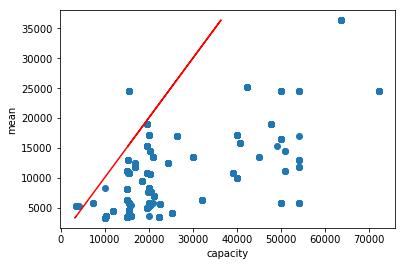

In [46]:
plt.scatter(hh['capa'], hh['y_mean'])
plt.plot(hh['y_mean'],hh['y_mean'], color='red')
plt.xlabel('capacity')
plt.ylabel('mean')

In [47]:
hh[(hh['y_mean']>24000) & (h['capa'] < 20000)]

,y,home_team,capa,humidity,gameday,y_mean
44,7101.0,横浜Ｆ・マリノス,15454,80,1,24603
141,9751.0,横浜Ｆ・マリノス,15454,85,1,24603
785,12537.0,横浜Ｆ・マリノス,15454,76,1,24603
832,13427.0,横浜Ｆ・マリノス,15454,64,1,24603
1373,11088.0,横浜Ｆ・マリノス,15454,27,1,24603
1478,13445.0,横浜Ｆ・マリノス,15454,74,0,24603
1734,11992.0,横浜Ｆ・マリノス,15454,82,1,24603
1839,13416.0,横浜Ｆ・マリノス,15454,78,1,24603


In [48]:
train[train['home_team'] == '横浜Ｆ・マリノス'].head(10)

,y,home_team,capa,humidity,gameday
10,19488.0,横浜Ｆ・マリノス,72327,80,1
31,22126.0,横浜Ｆ・マリノス,72327,50,1
44,7101.0,横浜Ｆ・マリノス,15454,80,1
66,21054.0,横浜Ｆ・マリノス,72327,55,1
92,25241.0,横浜Ｆ・マリノス,72327,40,1
112,23273.0,横浜Ｆ・マリノス,72327,84,1
126,26133.0,横浜Ｆ・マリノス,72327,63,1
141,9751.0,横浜Ｆ・マリノス,15454,85,1
158,24187.0,横浜Ｆ・マリノス,72327,72,1
178,33584.0,横浜Ｆ・マリノス,72327,74,1
